In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

In [2]:
import os
print(os.getcwd())

C:\Users\Radwa samir


In [3]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm


In [4]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy: {}".format(accuracy))



Decision Tree Accuracy: 0.7821229050279329


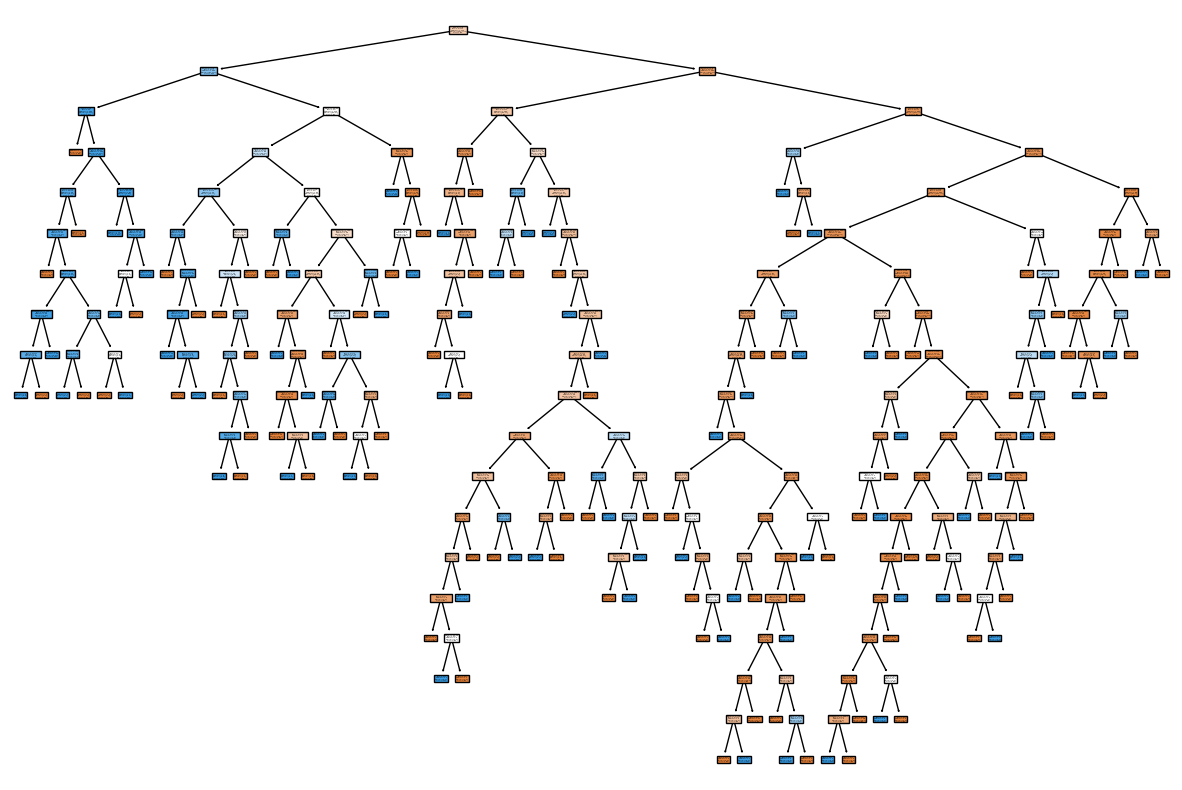

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plotting the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree, filled=True, feature_names=x.columns.tolist(), class_names=["No", "Yes"])
plt.show()

In [6]:

decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [7]:

decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Updated Decision Tree Accuracy: {}".format(accuracy))
print(" previous Decision Tree Accuracy: 0.7877094972067039")


Updated Decision Tree Accuracy: 0.8100558659217877
 previous Decision Tree Accuracy: 0.7877094972067039


In [8]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy (100 estimators): {}".format(accuracy))

Random Forest Accuracy (100 estimators): 0.8435754189944135


In [9]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Updated Random Forest Accuracy (200 estimators): {}".format(accuracy))

Updated Random Forest Accuracy (200 estimators): 0.8379888268156425
